In [1]:
import numpy as np
import pandas
import scipy.stats as st
from matplotlib import pyplot as plt
from typing import List, Tuple

# lets assume this code requires Python 3.6+ to run.


In [2]:
data = pandas.read_excel("dane_2020-2021.xlsx")
column_tag_list = [f"X{i}" for i in range(1, 11)]

/home/argmaster/Documents/dev/2022/sem2/tedw/.env/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
def bucketize(
    data: List[float], round_to: int = 3
) -> Tuple[List[str], List[float]]:
    max_val = max(data)
    min_val = min(data)
    print(max_val)
    print(min_val)
    bucket_count = len(data) // 4
    span = abs(max_val - min_val)
    bucket_size = span / bucket_count
    buckets = {}

    assert bucket_count > 0, "Bucket count have to be > 0, got: {bucket_count}"

    for i in range(bucket_count):
        bucket_min = min_val + i * bucket_size
        bucket_max = min_val + (i + 1) * bucket_size
        buckets[bucket_min, bucket_max] = []
    else:
        last_bucket = buckets[bucket_min, bucket_max]

    for value in data:
        # small faux-pass here: order is not guaranteed on every runtime environment
        # however with CPython 3.6+ dictionary keeps order of insertions.
        # MAY be a problem with Jython or PyPy or older CPython versions
        for (bucket_min, bucket_max), bucket in buckets.items():
            if bucket_min <= value <= bucket_max:
                bucket.append(value)
                break
        else:
            last_bucket.append(value)
    labels = []
    values = []
    for k, v in buckets.items():
        labels.append(f"<{round(k[0], round_to)}; {round(k[1], round_to)})")
        values.append(v)
    return labels, values


0.7889048845311619
0.48557743865949826


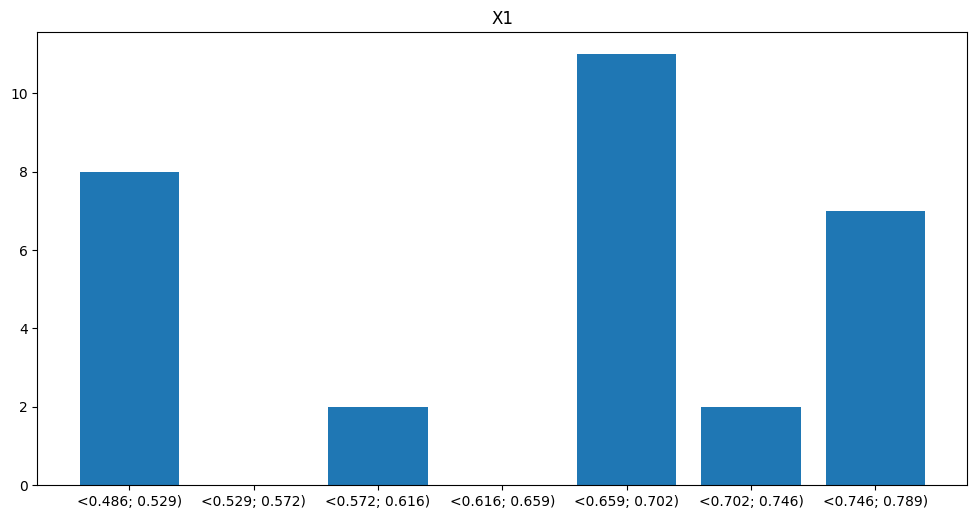

In [4]:
for column_tag in column_tag_list:
    column = data[column_tag]
    # rozstęp
    r = column.max() - column.min()
    d = (column.max() + column.min()) / 2
    m = column.mean()
    w = column.median()
    n = len(column)
    s = np.sqrt(sum((column[i] - m) ** 2 for i in range(n)) / n)

    q = 3 * ((m - w) / s)

    q1 = (column.min() / column.max()) > 0.1
    q2 = abs(d - m) < s
    q3 = 3 <= (r / s) <= 5
    q4 = abs(q) < 2

    if q1 and q2 and q3 and q4:
        continue

    labels, values = bucketize(column)
    Ys = np.arange(len(labels))
    plt.figure(figsize=(12, 6), dpi=100)
    plt.bar(Ys, height=[len(v) for v in values])
    plt.xticks(Ys, labels)
    plt.title(column_tag)
    break

